# P2 Office Supplies Data (P2- OfficeSupplies Data.csv)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
d1 = pd.read_csv("/content/P2- OfficeSupplies Data.csv")
d1

OrderDate   Region      Rep     Item  Units  Unit Price
0   04-Jul-14     East  Richard  Pen Set     62        4.99
1   12-Jul-14     East     Nick   Binder     29        1.99
2   21-Jul-14  Central   Morgan  Pen Set     55       12.49
3   29-Jul-14     East    Susan   Binder     81       19.99
4   07-Aug-14  Central  Matthew  Pen Set     42       23.95
5   15-Aug-14     East  Richard   Pencil     35        4.99
6   24-Aug-14     West    James     Desk      3      275.00
7   01-Sep-14  Central    Smith     Desk      2      125.00
8   10-Sep-14  Central     Bill   Pencil      7        1.29
9   18-Sep-14     East  Richard  Pen Set     16       15.99
10  27-Sep-14     West    James      Pen     76        1.99
11  05-Oct-14  Central   Morgan   Binder     28        8.99
12  14-Oct-14     West   Thomas   Binder     57       19.99
13  22-Oct-14     East  Richard      Pen     64        8.99
14  31-Oct-14  Central   Rachel   Pencil     14        1.29
15  08-Nov-14     East    Susan      Pen     15       19.99
16  17-Nov-14  Central     Alex   Binder     11        4.99
17  25-Nov-14  Central  Matthew  Pen Set     96        4.99
18  04-Dec-14  Central     Alex   Binder     94       19.99
19  12-Dec-14  Central    Smith   Pencil     67        1.29
20  21-Dec-14  Central   Rachel   Binder     28        4.99
21  29-Dec-14     East    Susan  Pen Set     74       15.99
22  06-Jan-15     East  Richard   Pencil     95        1.99
23  15-Jan-15  Central     Bill   Binder     46        8.99
24  23-Jan-15  Central  Matthew   Binder     50       19.99
25  01-Feb-15  Central    Smith   Binder     87       15.00
26  09-Feb-15  Central     Alex   Pencil     36        4.99
27  18-Feb-15     East  Richard   Binder      4        4.99
28  26-Feb-15  Central     Bill      Pen     27       19.99
29  07-Mar-15     West    James   Binder      7       19.99
30  15-Mar-15     West    James   Pencil     56        2.99
31  24-Mar-15  Central     Alex  Pen Set     50        4.99
32  01-Apr-15     East  Richard   Binder     60        4.99
33  10-Apr-15  Central   Rachel   Pencil     66        1.99
34  18-Apr-15  Central   Rachel   Pencil     75        1.99
35  27-Apr-15     East     Nick      Pen     96        4.99
36  05-May-15  Central     Alex   Pencil     90        4.99
37  14-May-15  Central     Bill   Pencil     53        1.29
38  22-May-15     West   Thomas   Pencil     32        1.99
39  31-May-15  Central     Bill   Binder     80        8.99
40  08-Jun-15     East  Richard   Binder     60        8.99
41  17-Jun-15  Central  Matthew     Desk      5      125.00
42  25-Jun-15  Central   Morgan   Pencil     90        4.99

**1. Sales Analysis:**
 - What are the total sales for each product category?

In [ ]:

d1['TotalSales'] = d1['Units'] * d1['Unit Price']


In [ ]:

total_sales_per_category = d1.groupby('Item')['TotalSales'].sum().reset_index()

total_sales_per_category.columns = ['Product Category', 'Total Sales']

print(total_sales_per_category)

  Product Category  Total Sales
0           Binder      9577.65
1             Desk      1700.00
2              Pen      2045.22
3          Pen Set      4169.87
4           Pencil      2135.14


   - Which product category has the highest sales?

In [ ]:
max_sales_category = total_sales_per_category.loc[total_sales_per_category['Total Sales'].idxmax()]
max_sales_category

Product Category     Binder
Total Sales         9577.65
Name: 0, dtype: object

   - Identify the top 10 best-selling products.



In [ ]:

top_10 = d1.sort_values(by='TotalSales', ascending=False).head(10)

print("Top 10 best-selling products:")
print(top_10)

Top 10 best-selling products:
    OrderDate   Region      Rep     Item  Units  Unit Price  TotalSales
18  04-Dec-14  Central     Alex   Binder     94       19.99     1879.06
3   29-Jul-14     East    Susan   Binder     81       19.99     1619.19
25  01-Feb-15  Central    Smith   Binder     87       15.00     1305.00
21  29-Dec-14     East    Susan  Pen Set     74       15.99     1183.26
12  14-Oct-14     West   Thomas   Binder     57       19.99     1139.43
4   07-Aug-14  Central  Matthew  Pen Set     42       23.95     1005.90
24  23-Jan-15  Central  Matthew   Binder     50       19.99      999.50
6   24-Aug-14     West    James     Desk      3      275.00      825.00
39  31-May-15  Central     Bill   Binder     80        8.99      719.20
2   21-Jul-14  Central   Morgan  Pen Set     55       12.49      686.95


**2.  Customer Analysis:**

- Who are the top 10 customers by sales?

In [ ]:

total_sales_per_customer = d1.groupby('Rep')['TotalSales'].sum().reset_index()

top_10_customers = total_sales_per_customer.sort_values(by='TotalSales', ascending=False).head(10)

print("Top 10 customers by sales:")
print(top_10_customers)

Top 10 customers by sales:
        Rep  TotalSales
3   Matthew     3109.44
9     Susan     3102.30
0      Alex     2812.19
7   Richard     2363.04
1      Bill     1749.87
8     Smith     1641.43
4    Morgan     1387.77
2     James     1283.61
10   Thomas     1203.11
5      Nick      536.75


   - What is the total number of unique customers?

In [ ]:
unique_customers_count = d1['Rep'].nunique()

print("Total number of unique customers:")
print(unique_customers_count)

Total number of unique customers:
11


   - Analyze customer purchase frequency.

In [ ]:
purchase_frequency = d1['Rep'].value_counts().reset_index()
purchase_frequency

Rep  count
0   Richard      8
1      Bill      5
2      Alex      5
3   Matthew      4
4     James      4
5    Rachel      4
6    Morgan      3
7     Susan      3
8     Smith      3
9      Nick      2
10   Thomas      2

**3.  Time Series Analysis:**

In [ ]:
d1['OrderDate'] = pd.to_datetime(d1['OrderDate'])


<ipython-input-22-9a0d2294ff52>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  d1['OrderDate'] = pd.to_datetime(d1['OrderDate'])


In [ ]:
print("Order dates in datetime format:")
print(d1['OrderDate'])

Order dates in datetime format:
0    2014-07-04
1    2014-07-12
2    2014-07-21
3    2014-07-29
4    2014-08-07
5    2014-08-15
6    2014-08-24
7    2014-09-01
8    2014-09-10
9    2014-09-18
10   2014-09-27
11   2014-10-05
12   2014-10-14
13   2014-10-22
14   2014-10-31
15   2014-11-08
16   2014-11-17
17   2014-11-25
18   2014-12-04
19   2014-12-12
20   2014-12-21
21   2014-12-29
22   2015-01-06
23   2015-01-15
24   2015-01-23
25   2015-02-01
26   2015-02-09
27   2015-02-18
28   2015-02-26
29   2015-03-07
30   2015-03-15
31   2015-03-24
32   2015-04-01
33   2015-04-10
34   2015-04-18
35   2015-04-27
36   2015-05-05
37   2015-05-14
38   2015-05-22
39   2015-05-31
40   2015-06-08
41   2015-06-17
42   2015-06-25
Name: OrderDate, dtype: datetime64[ns]


In [ ]:

d1['YearMonth'] = d1['OrderDate'].dt.to_period('M')

monthly_sales = d1.groupby('YearMonth')['Unit Price'].sum().reset_index()

monthly_sales = monthly_sales.sort_values(by='YearMonth')


  - What are the monthly sales trends over the past year?

In [ ]:
monthly_sales

YearMonth  Unit Price
0    2014-07       39.46
1    2014-08      303.94
2    2014-09      144.27
3    2014-10       39.26
4    2014-11       29.97
5    2014-12       42.26
6    2015-01       30.97
7    2015-02       44.97
8    2015-03       27.97
9    2015-04       13.96
10   2015-05       17.26
11   2015-06      138.98

In [ ]:
d1['Month'] = d1['OrderDate'].dt.month

 - What are the monthly sales trends over the past year?

In [ ]:
monthly_avg_sales = d1.groupby('Month')['Unit Price'].mean()
monthly_avg_sales

Month
1      10.323333
2      11.242500
3       9.323333
4       3.490000
5       4.315000
6      46.326667
7       9.865000
8     101.313333
9      36.067500
10      9.815000
11      9.990000
12     10.565000
Name: Unit Price, dtype: float64

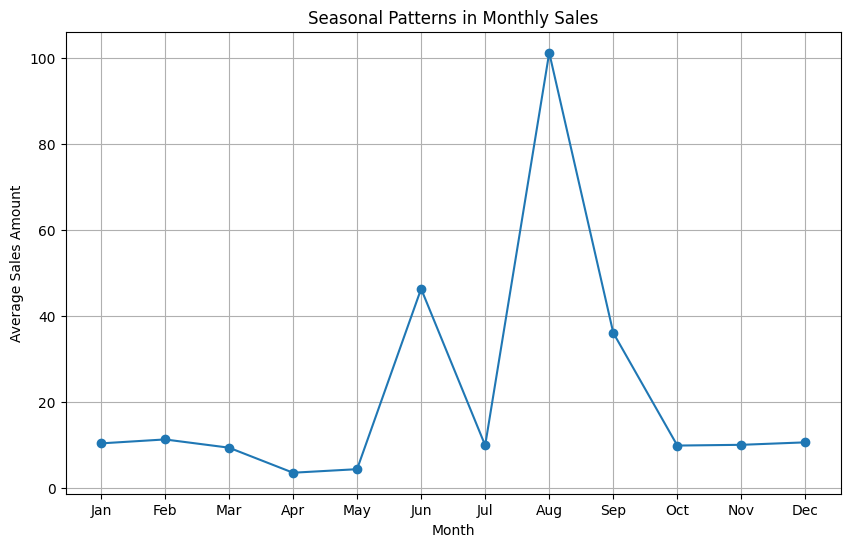

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_sales.index, monthly_avg_sales.values, marker='o', linestyle='-')
plt.title('Seasonal Patterns in Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales Amount')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [ ]:
total_sales_per_region = d1.groupby('Region')['Unit Price'].sum().reset_index()

total_sales_per_region

Region  Unit Price
0  Central      432.45
1     East      118.87
2     West      321.95

In [ ]:
top_regions = total_sales_per_region.sort_values(by='Unit Price', ascending=False)

print("Top regions by total sales:")
print(top_regions)

Top regions by total sales:
    Region  Unit Price
0  Central      432.45
2     West      321.95
1     East      118.87


   - What are the monthly sales trends over the past year?

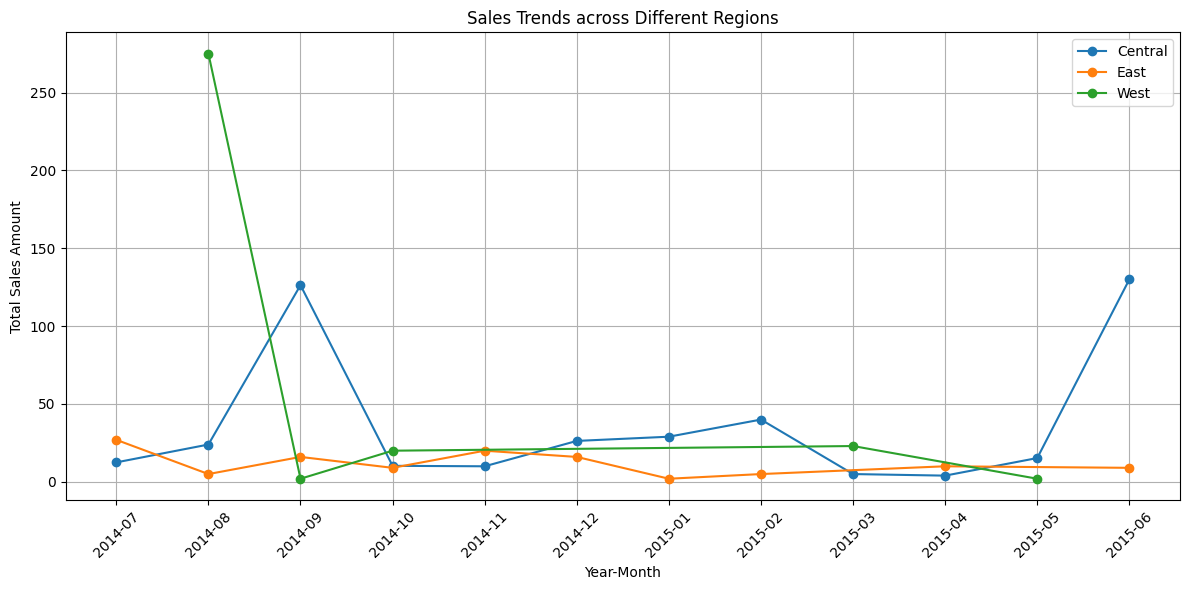

In [ ]:
sales_trends = d1.groupby(['Region', 'YearMonth'])['Unit Price'].sum().reset_index()

plt.figure(figsize=(12, 6))

for region in sales_trends['Region'].unique():
    region_data = sales_trends[sales_trends['Region'] == region]
    plt.plot(region_data['YearMonth'].astype(str), region_data['Unit Price'], marker='o', label=region)

plt.title('Sales Trends across Different Regions')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**5.  Profit Analysis:**

   - What is the total profit for each product category?

In [ ]:
d1['Profit'] = d1['Unit Price'] - d1['TotalSales']

total_profit_per_category = d1.groupby('Rep')['Profit'].sum().reset_index()

print("Total profit for each product category:")
print(total_profit_per_category)

Total profit for each product category:
        Rep   Profit
0      Alex -2772.24
1      Bill -1709.32
2     James  -983.64
3   Matthew -2935.51
4    Morgan -1361.30
5      Nick  -529.77
6    Rachel  -428.11
7   Richard -2307.12
8     Smith -1500.14
9     Susan -3046.33
10   Thomas -1181.13


In [ ]:
d1['Total Revenue'] = d1['Units'] * d1['Unit Price']

total_sales = d1['Total Revenue'].sum()


   - Identify the top 10 most profitable products.

In [ ]:
d1['Profit'] = d1['Units'] * d1['Unit Price']
total_profit_per_item = d1.groupby('Item')['Profit'].sum().reset_index()

top_10_profitable_products = total_profit_per_item.sort_values(by='Profit', ascending=False).head(5)

print("Top 10 most profitable products:")
print(top_10_profitable_products)

Top 10 most profitable products:
      Item   Profit
0   Binder  9577.65
3  Pen Set  4169.87
4   Pencil  2135.14
2      Pen  2045.22
1     Desk  1700.00
